# .gov.ua Websites

This notebook analyzes data collected by the `monitor.py` program that checks to see what .gov.ua websites (obtained from Wikidata) can be connected to.

In [ ]:
! pip install pandas plotly ipyleaflet python-geoip-geolite2 python-geoip-python3

In [1]:
import pandas

df = pandas.read_csv('https://raw.githubusercontent.com/edsu/gov-ua/main/data.csv.gz', parse_dates=['run', 'time'])
df

,run,time,url,error
0,2022-02-26 15:21:11.457890,2022-02-26 15:21:19.130888,http://zborivrayrada.gov.ua,HTTPConnectionPool(host='zborivrayrada.gov.ua'...
1,2022-02-26 15:21:11.457890,2022-02-26 15:21:53.422481,http://www.adm-pl.gov.ua,"HTTPConnectionPool(host='www.adm-pl.gov.ua', p..."
2,2022-02-26 15:21:11.457890,2022-02-26 15:21:55.066555,http://pogrda.gov.ua,"HTTPConnectionPool(host='pogrda.gov.ua', port=..."
3,2022-02-26 15:21:11.457890,2022-02-26 15:21:42.104289,http://www.oda.te.gov.ua,"HTTPSConnectionPool(host='oda.te.gov.ua', port..."
4,2022-02-26 15:21:11.457890,2022-02-26 15:21:45.803619,http://www.vberez.gov.ua,"HTTPConnectionPool(host='www.vberez.gov.ua', p..."
...,...,...,...,...
355651,2022-03-12 11:47:24.832034,2022-03-12 11:55:50.505424,http://www.vinrada.gov.ua,"HTTPConnectionPool(host='www.vinrada.gov.ua', ..."
355652,2022-03-12 11:47:24.832034,2022-03-12 11:54:16.047733,http://www.volynrada.gov.ua,HTTPConnectionPool(host='www.volynrada.gov.ua'...
355653,2022-03-12 11:47:24.832034,2022-03-12 11:54:48.945356,http://www.vru.gov.ua,"HTTPConnectionPool(host='www.vru.gov.ua', port..."
355654,2022-03-12 11:47:24.832034,2022-03-12 11:54:51.365681,http://www.yalta-gs.gov.ua,"HTTPConnectionPool(host='www.yalta-gs.gov.ua',..."


In [2]:
counts = df.groupby('run').count()
counts

,time,url,error
run,,,
2022-02-26 15:21:11.457890,467,467,467
2022-02-26 15:51:11.557991,463,463,463
2022-02-26 16:21:11.657656,455,455,455
2022-02-26 16:51:11.700891,456,456,456
2022-02-26 17:21:11.754011,455,455,455
...,...,...,...
2022-03-12 09:47:24.589319,513,513,513
2022-03-12 10:17:24.630144,508,508,508
2022-03-12 10:47:24.675601,520,520,520


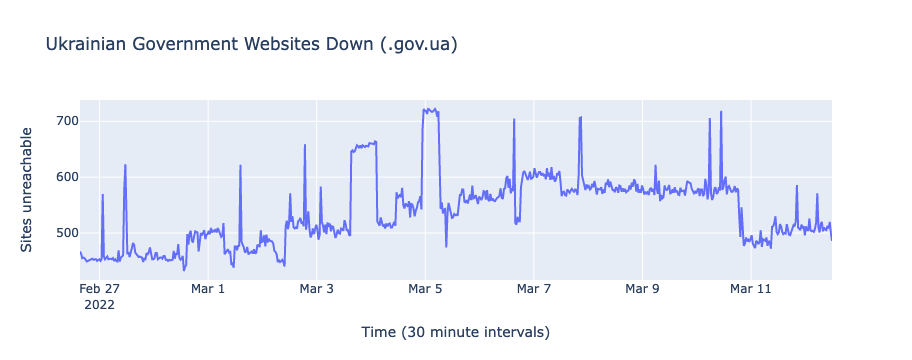

In [15]:
from plotly import express as xp

xp.line(
    df, 
    x=counts.index,
    y=counts.error,
    labels={'x': 'Time (30 minute intervals)', 'y': 'Sites unreachable'},
    title='Ukrainian Government Websites Down (.gov.ua)'
)

While there have been blips here and there it looks like a sustained outage began on March 3 at 15:17. Can we zoom in to see which websites these are? We can get the observations the hour before and after and see what hostnames differ.

In [4]:
from datetime import datetime, timezone

after = df[df['run'] >= datetime(2022, 3, 3, 15, 17, 0)]
just_before = df[(df['run'] >= datetime(2022, 3, 3, 13, 17, 0)) & (df['run'] < datetime(2022, 3, 3, 15, 17, 0))]

We can gt the website URLs for each period:

In [5]:
urls_before = just_before['url'].unique()
urls_after = after['url'].unique()

Now we can see which website URLs weren't down before, but were after with a bit of set logic.

In [6]:
urls_down = set(urls_after) - set(urls_before)
urls_down

{'http://2001.ukrcensus.gov.ua',
 'http://academia.gov.ua',
 'http://adm.od.court.gov.ua',
 'http://apladm.dn.court.gov.ua',
 'http://apladm.dp.court.gov.ua',
 'http://apladm.hr.court.gov.ua',
 'http://apladm.lv.court.gov.ua',
 'http://apladm.od.court.gov.ua',
 'http://arbuzinka.mk.gov.ua',
 'http://archivelviv.gov.ua',
 'http://archives.kh.gov.ua',
 'http://ark.gp.gov.ua',
 'http://artemrada.gov.ua',
 'http://avangard.odessa.gov.ua',
 'http://bashtanka.mk.gov.ua',
 'http://bc.te.court.gov.ua',
 'http://bcrda.gov.ua',
 'http://berdichev-rayrada.zt.gov.ua',
 'http://bk.loga.gov.ua',
 'http://bobradm.cg.gov.ua',
 'http://bogodukhivrda.gov.ua',
 'http://borzadm.cg.gov.ua',
 'http://br.ko.court.gov.ua',
 'http://bratske.mk.gov.ua',
 'http://brovary-rada.gov.ua',
 'http://buvrzt.gov.ua',
 'http://bv.loga.gov.ua',
 'http://cdago.gov.ua',
 'http://cdiak.archives.gov.ua',
 'http://cdnta.archives.gov.ua',
 'http://centerjust.gov.ua',
 'http://cg.gov.ua',
 'http://chadm.cg.gov.ua',
 'http://chas

In [7]:
len(urls_down)

505

Scanning the list makes it clear that a large number of these are host names invoving of `gromada.gov.ua`. Gromada in Ukrainian translates to Community in English. Here is one example from the Wayback Machine:

https://web.archive.org/web/20220228201105/https://ezupilska-gromada.gov.ua/

We can see if it's possible to get a sense of where these hostnames are hosted. First we need an IP address for the host:

In [8]:
from socket import gethostbyname

gethostbyname('ezupilska-gromada.gov.ua')

'195.248.234.252'

And then we need to see if we can find geo information fot that IP:

In [9]:
from geoip import geolite2

geolite2.lookup('195.248.234.252')

<IPInfo ip='195.248.234.252' country='UA' continent='EU' subdivisions=frozenset({'05'}) timezone='Europe/Kiev' location=(49.2328, 28.481)>

Lets write a function and apply it to our dataset.

In [10]:
from urllib.parse import urlparse 

def geo(url):
    uri = urlparse(url)
    try:
        hostname = uri.netloc
        ip = gethostbyname(hostname)
        loc = geolite2.lookup(ip)
        return loc.location
    except Exception as e:
        print(f"Failed to lookup {url}: {e}")
        return None

geo('https://ezupilska-gromada.gov.ua/')

(49.2328, 28.481)

In [11]:
df2 = pandas.DataFrame({"url": list(urls_down)})
df2

,url
0,http://bobradm.cg.gov.ua
1,http://br.ko.court.gov.ua
2,http://www.shirok-rn.dp.gov.ua
3,http://tea.court.gov.ua
4,http://www.nsj.gov.ua
...,...
500,https://pyatihmr.dp.gov.ua
501,https://vlep-gromada.gov.ua
502,http://buvrzt.gov.ua
503,http://ifa.court.gov.ua


In [ ]:
df2['geo'] = df2.url.map(geo)
df2

Failed to lookup http://bobradm.cg.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://semadm.cg.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup https://te.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://cdiak.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://tsdial.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://cg.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup http://tsdea.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://chadm.cg.gov.ua: [Errno 8] nodename nor servname provided, or not known
Failed to lookup https://volyn.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://lg.archives.gov.ua: 'NoneType' object has no attribute 'location'
Failed to lookup http://krliman.gov.ua: 'NoneType' object has no

,url,geo
0,http://bobradm.cg.gov.ua,None
1,http://br.ko.court.gov.ua,"(50.45, 30.5233)"
2,http://www.shirok-rn.dp.gov.ua,"(50.45, 30.5233)"
3,http://tea.court.gov.ua,"(50.45, 30.5233)"
4,http://www.nsj.gov.ua,"(50.45, 30.5233)"
...,...,...
500,https://pyatihmr.dp.gov.ua,"(50.45, 30.5233)"
501,https://vlep-gromada.gov.ua,"(49.2328, 28.481)"
502,http://buvrzt.gov.ua,"(50.45, 30.5233)"
503,http://ifa.court.gov.ua,"(50.45, 30.5233)"


Unpack the lat/lon into separate columns:

In [ ]:
dir(df2['geo'])
df3 = df2[df2['geo'].notna()].copy()

df3['lat'] = df3['geo'].map(lambda a: a[0])
df3['lon'] = df3['geo'].map(lambda a: a[1])
df3 = df3.drop(columns=['geo'])
df3

,url,lat,lon
1,http://br.ko.court.gov.ua,50.4500,30.5233
2,http://www.shirok-rn.dp.gov.ua,50.4500,30.5233
3,http://tea.court.gov.ua,50.4500,30.5233
4,http://www.nsj.gov.ua,50.4500,30.5233
6,http://www.solon-rn.dp.gov.ua,50.4500,30.5233
...,...,...,...
499,http://kirrda.kr-admin.gov.ua,48.5132,32.2597
500,https://pyatihmr.dp.gov.ua,50.4500,30.5233
501,https://vlep-gromada.gov.ua,49.2328,28.4810
502,http://buvrzt.gov.ua,50.4500,30.5233


Save it so we don't need to recalculate:

In [80]:
df3.to_csv('notebook.csv', index=False)

In [81]:
df3 = pandas.read_csv('notebook.csv')

from ipywidgets import Layout
from ipyleaflet import Map, Marker, MarkerCluster, basemaps

center = (50.44676, 30.51313)

m = Map(center=center, zoom=4, basemap=basemaps.CartoDB.Positron, layout=Layout(height='800px'))


marker = Marker(location=center, draggable=False, title="Kyivt")
m.add_layer(marker);

markers = []
for i, row in df3.iterrows():
    markers.append(Marker(location=(row['lat'], row['lon']), draggable=False, title=row['url']))

marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster);
    
m

Map(center=[50.44676, 30.51313], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [82]:
m.save('outage-map.html', title='Website Outage 2020-03-03')